# E-commerce Classifier

#### __Gerald Darwin D. Lariosa__

**April 11, 2025**

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
nltk.download('wordnet')
stop_words = stopwords.words('english')
lmtzr = WordNetLemmatizer()
vectorizer = TfidfVectorizer()
clf = MultinomialNB()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


&nbsp;

In [3]:
df = pd.read_csv("ecd.csv", header=None)
df.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
df.columns = ['label', 'text']
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [5]:
df['label'].unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [6]:
df['label'].value_counts()

label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [7]:
df.isnull().sum()

label    0
text     1
dtype: int64

In [8]:
df = df.dropna()
df

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [9]:
df.duplicated().sum()

22622

In [10]:
df[df.duplicated()]

,label,text
7,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
11,Household,Paper Plane Design Starry Night Vangoh Wall Ar...
12,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
16,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
20,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [11]:
df = df.drop_duplicates()
df

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50402,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...
50403,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...
50407,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ..."
50408,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27802 entries, 0 to 50410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   27802 non-null  object
 1   text    27802 non-null  object
dtypes: object(2)
memory usage: 651.6+ KB


In [13]:
df.describe()

,label,text
count,27802,27802
unique,4,27802
top,Household,Paper Plane Design Framed Wall Hanging Motivat...
freq,10564,1


In [14]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [15]:
df['cleaned_text'] = df['text'].apply(clean_text)
df

C:\Users\user\AppData\Local\Temp\ipykernel_3236\4105411807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].apply(clean_text)


,label,text,cleaned_text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf floral framed painting wood inch x inch sp...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf uv textured modern art print framed painti...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print framed painting synthetic inc...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gift india wooden happy birthday un...
...,...,...,...
50402,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...,micromax bharat plus zero impact visual displa...
50403,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,microsoft lumia gb g black microsoft lumia exp...
50407,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",microsoft lumia black gb colourblack product d...
50408,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,karbonn titanium wind w white karbonn titanium...


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.3, random_state=42)

In [17]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [18]:
clf.fit(X_train, y_train)

MultinomialNB()

In [19]:
nb_predicted = clf.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, nb_predicted)
print(cm)

[[1713   17   23  162]
 [   2 1559    8  106]
 [  12    3 1338  222]
 [  25   21   30 3100]]


<function matplotlib.pyplot.show(close=None, block=None)>

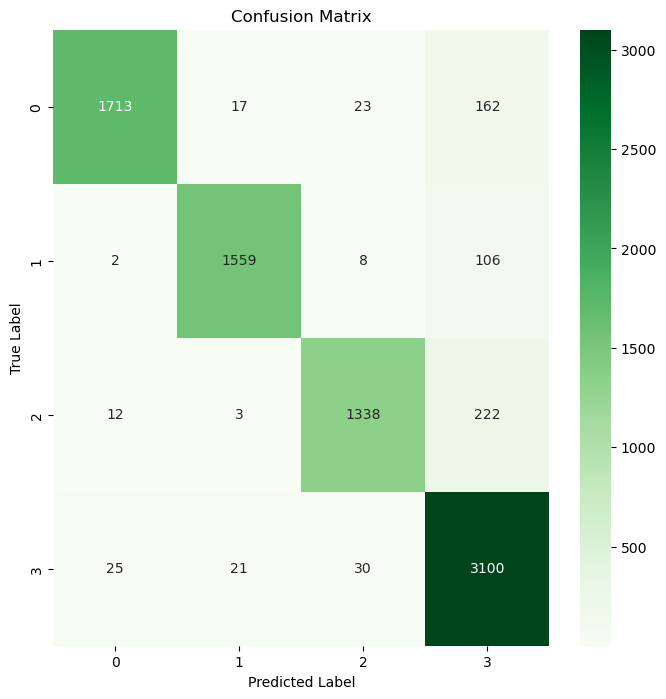

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show

In [22]:
print(classification_report(y_test, nb_predicted))

                        precision    recall  f1-score   support

                 Books       0.98      0.89      0.93      1915
Clothing & Accessories       0.97      0.93      0.95      1675
           Electronics       0.96      0.85      0.90      1575
             Household       0.86      0.98      0.92      3176

              accuracy                           0.92      8341
             macro avg       0.94      0.91      0.93      8341
          weighted avg       0.93      0.92      0.92      8341

